In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics
import pandas as pd

pd.set_option('display.max_columns', None)

df = pd.read_csv('bimtra_intermediario.csv')
df = df.drop(columns=['flightid', 'dt_arr', 'hora_ref', 'esperas', 'rota'])
df['rota'] = df['origem'] + "-" + df['destino']

df = df[(df['ELDT'] >= 1200) & (df['ELDT'] <= 16000)]
df.reset_index(drop=True, inplace=True)

In [2]:
# colors

rc = {
    "axes.facecolor": "#F8F8F8",
    "figure.facecolor": "#F8F8F8",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7" + "30",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)
palette = ['#302c36', '#037d97', '#E4591E', '#C09741',
           '#EC5B6D', '#90A6B1', '#6ca957', '#D8E3E2']

from colorama import Style, Fore
blk = Style.BRIGHT + Fore.BLACK
mgt = Style.BRIGHT + Fore.MAGENTA
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
res = Style.RESET_ALL

In [3]:
df.head(2)

,origem,destino,dt_dep,hour,month,day_of_week,part_of_day,ELDT,rota
0,SBKP,SBRJ,2022-06-01 00:44:57,0,6,2,night,2463.0,SBKP-SBRJ
1,SBGR,SBRJ,2022-06-01 00:57:01,0,6,2,night,2152.0,SBGR-SBRJ


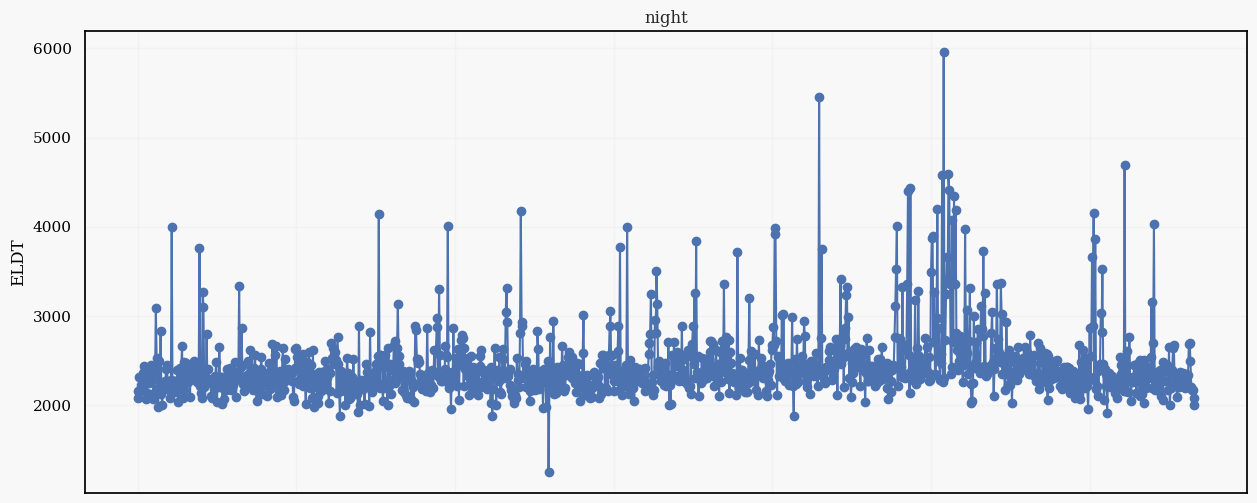

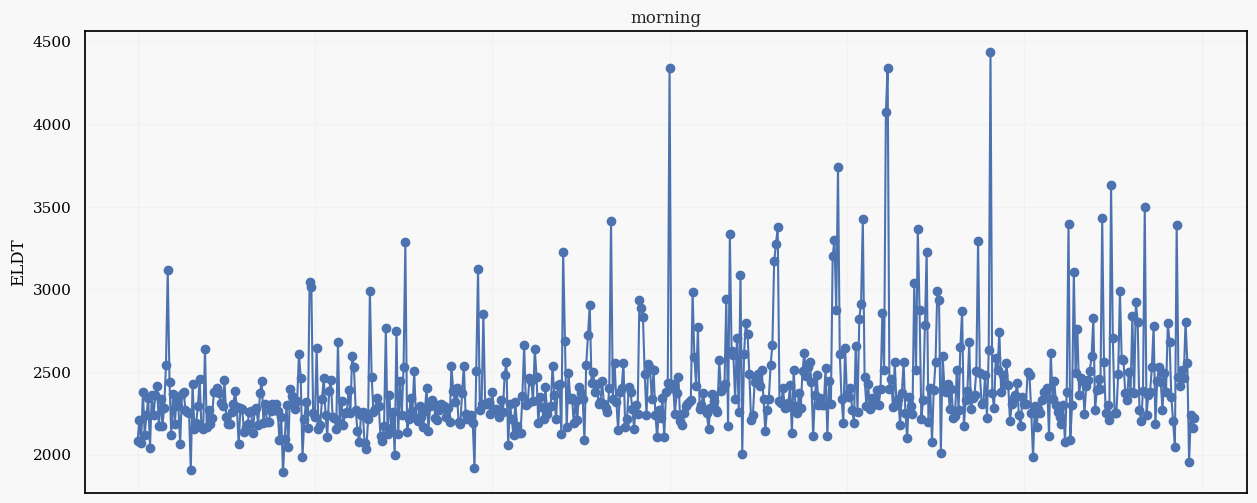

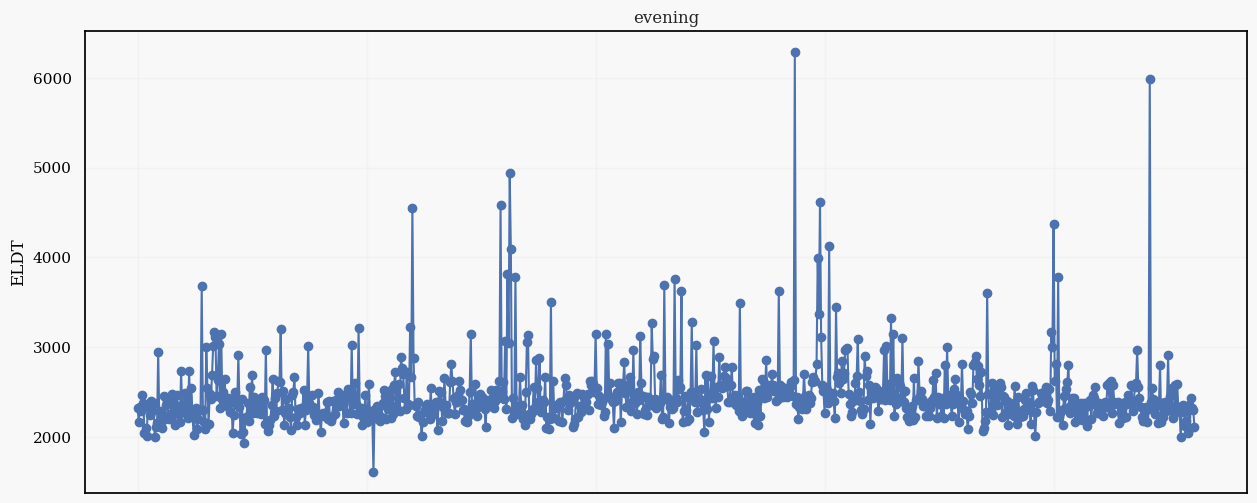

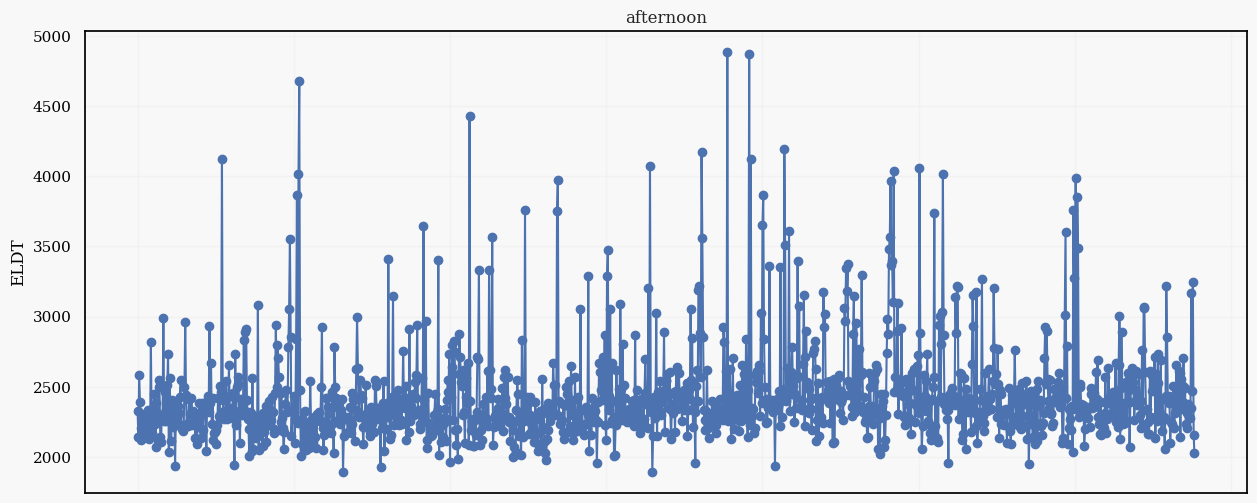

In [4]:
# Rota Guarulhos para Santos Dumont
rota = df[df['rota'] == 'SBGR-SBRJ']

fig_size = (15, 6)

for part in rota['part_of_day'].unique():
    subset = rota[rota['part_of_day'] == part]
    ax = subset.plot(x='dt_dep', y='ELDT', title=part, marker='o', legend=False, figsize=fig_size)
    plt.ylabel('ELDT')
    plt.xlabel('')
    ax.tick_params(axis='x', rotation=45, labelbottom=False)
    plt.show()

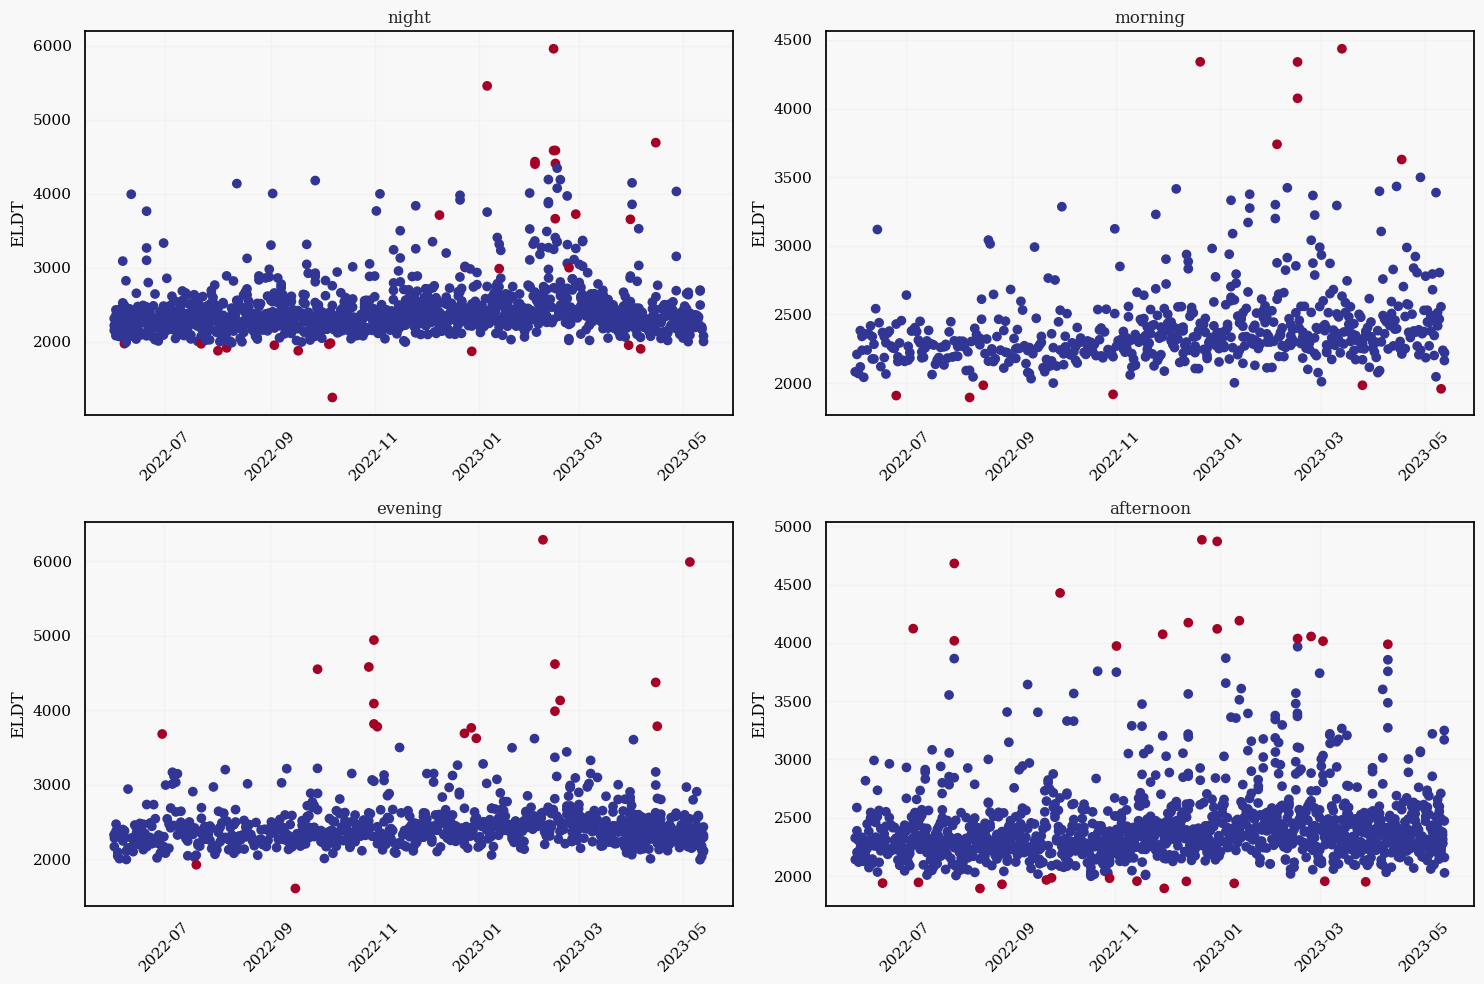

In [35]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

subset = df[df['rota'] == 'SBGR-SBRJ'].copy()
subset['dt_dep'] = pd.to_datetime(subset['dt_dep'])

lof = LocalOutlierFactor(n_neighbors=30, contamination=0.02)
scaler = StandardScaler()

parts = subset['part_of_day'].unique()
n_parts = len(parts)
n_rows = int(np.ceil(n_parts / 2))

fig, axes = plt.subplots(n_rows, 2, figsize=(15, 5 * n_rows))
if n_parts % 2 != 0:
    fig.delaxes(axes.flatten()[-1])

for idx, part in enumerate(parts):
    ax = axes.flatten()[idx]
    
    data_part = subset[subset['part_of_day'] == part].copy()
    X = data_part[['ELDT']].values
    X_scaled = scaler.fit_transform(X)
    
    outlier_scores = lof.fit_predict(X_scaled)
    
    data_part['outlier'] = outlier_scores
    sc = ax.scatter(data_part['dt_dep'], data_part['ELDT'], c=data_part['outlier'], cmap='RdYlBu')
    
    ax.set_title(part)
    ax.set_ylabel('ELDT')
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

plt.tight_layout()
plt.show()